# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Core Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# Model Selection
from sklearn.model_selection import train_test_split

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Evaluation Metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Membaca data hasil clustering
df = pd.read_csv('segmented_marketing_campaign.csv')

In [3]:
# Preview data
print("5 DATA PERTAMA:\n")
display(df.head())

5 DATA PERTAMA:



,Age,Total_Children,Total_Spending,Tenure_Days,Total_Store_Visits,Education,Marital_Status,Favorite_Category,Cluster
0,68,0,1551.5,971,25,Graduation,Single,Wines,0
1,71,2,27.0,125,6,Graduation,Single,Wines,1
2,60,0,776.0,472,21,Graduation,Together,Wines,0
3,41,1,53.0,65,8,Graduation,Together,MeatProducts,2
4,44,1,422.0,321,19,PhD,Married,Wines,2


In [4]:
# Menampilkan informasi tentang struktur dataset
print("INFORMASI DATASET:\n")
print(df.info())

INFORMASI DATASET:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 2240 non-null   int64  
 1   Total_Children      2240 non-null   int64  
 2   Total_Spending      2240 non-null   float64
 3   Tenure_Days         2240 non-null   int64  
 4   Total_Store_Visits  2240 non-null   int64  
 5   Education           2240 non-null   object 
 6   Marital_Status      2240 non-null   object 
 7   Favorite_Category   2240 non-null   object 
 8   Cluster             2240 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 157.6+ KB
None


In [5]:
# Menampilkan statistik deskriptif
print("STATISTIK DESKRIPTIF:")
display(df.describe())

STATISTIK DESKRIPTIF:


,Age,Total_Children,Total_Spending,Tenure_Days,Total_Store_Visits,Cluster
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,56.147768,0.950446,568.206696,512.043304,14.690625,0.875446
std,11.771725,0.751803,547.036742,232.229893,7.472104,0.844352
min,29.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,68.750000,340.750000,8.000000,0.000000
50%,55.000000,1.000000,395.000000,513.000000,15.000000,1.000000
75%,66.000000,1.000000,990.500000,685.250000,21.000000,2.000000
max,93.000000,3.000000,2099.500000,1063.000000,35.000000,2.000000


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [6]:
# Pisahkan data menjadi fitur dan label
X = df.drop(columns=['Cluster'])  # Fitur (tanpa kolom Cluster)
y = df['Cluster']  # Label (kolom Cluster)

In [7]:
# Buat preprocessing pipeline untuk menangani fitur numerik dan kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Total_Children', 'Total_Spending', 'Tenure_Days', 'Total_Store_Visits']),
        ('cat', OneHotEncoder(drop='first'), ['Education', 'Marital_Status', 'Favorite_Category'])
    ])

In [8]:
# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Membuat pipeline dengan Random Forest dan preprocessing
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [10]:
# Melatih model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Total_Children',
                                                   'Total_Spending',
                                                   'Tenure_Days',
                                                   'Total_Store_Visits']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Education',
                                                   'Marital_Status',
                                                   'Favorite_Category'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [11]:
# Prediksi dan evaluasi model
y_pred = pipeline.predict(X_test)

# Evaluasi
print(f"AKURASI:\n {accuracy_score(y_test, y_pred):.3f}")
print("LAPORAN KLASIFIKASI:\n")
print(classification_report(y_test, y_pred))

AKURASI:
 0.958
LAPORAN KLASIFIKASI:

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       199
           1       0.96      0.94      0.95       126
           2       0.97      0.94      0.95       123

    accuracy                           0.96       448
   macro avg       0.96      0.95      0.96       448
weighted avg       0.96      0.96      0.96       448



In [12]:
# Evaluasi model pada data latih dan uji
train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)

print("AKURASI DATA TRAIN:\n", train_accuracy)
print(f"AKURASI DATA TEST:\n {test_accuracy:.3f}")

# Jika akurasi data latih jauh lebih tinggi dari data uji, kemungkinan overfitting
# Jika kedua akurasi rendah, kemungkinan underfitting

AKURASI DATA TRAIN:
 1.0
AKURASI DATA TEST:
 0.958


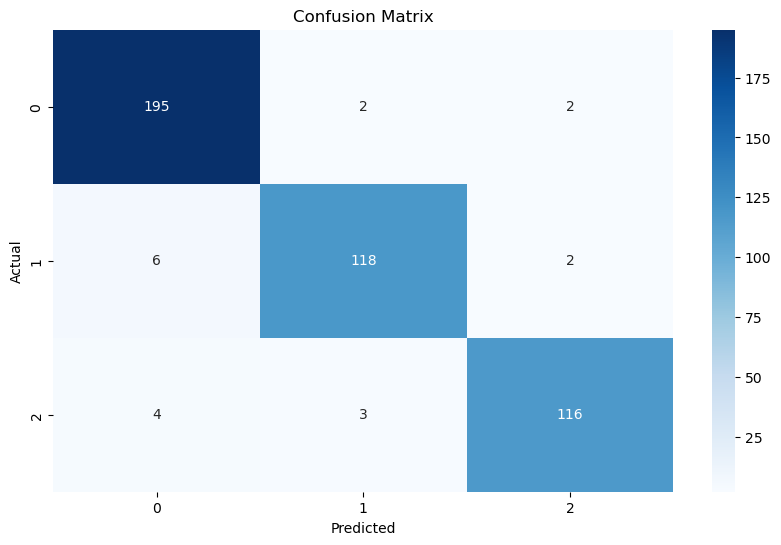

In [13]:
# Confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

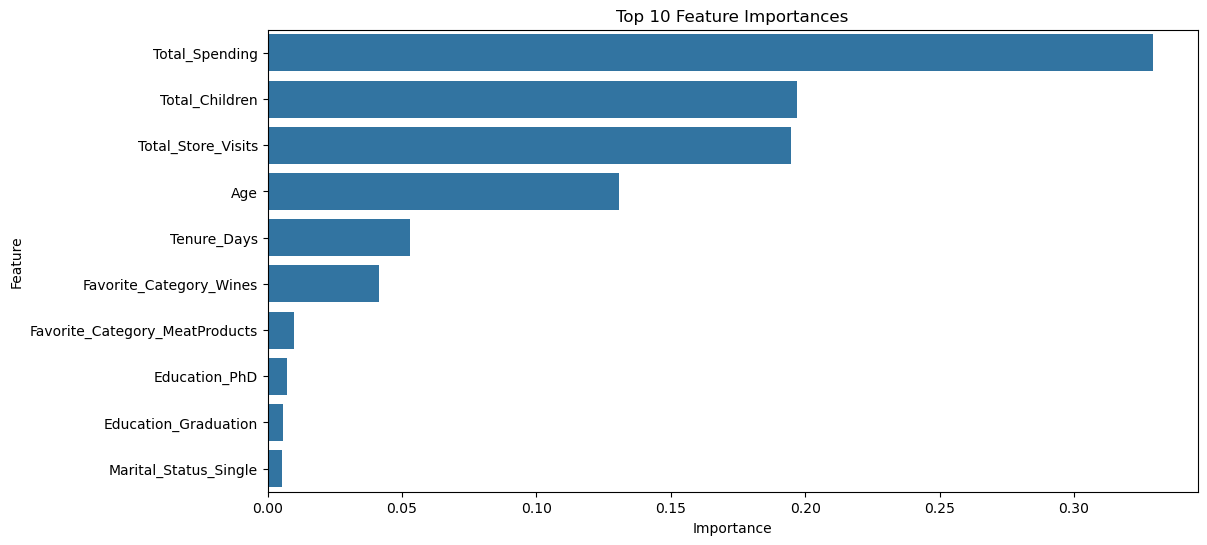

In [14]:
# Feature importance
feature_importances = pipeline.named_steps['classifier'].feature_importances_

# Mendapatkan nama fitur numerik dan hasil one-hot encoding untuk fitur kategorikal
numerical_features = ['Age', 'Total_Children', 'Total_Spending', 'Tenure_Days', 'Total_Store_Visits']
categorical_features = ['Education', 'Marital_Status', 'Favorite_Category']
encoded_features = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()

# Gabungkan nama fitur
features = numerical_features + encoded_features

# Buat DataFrame untuk feature importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values('Importance', ascending=False)

# Visualisasikan fitur yang paling penting
plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [15]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [16]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.

### **1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).**

**Sebelum tuning:**

Classification Report:
    
| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| **0** | 0,95 | 0,98 | 0,97 | 199 |
| **1** | 0,96 | 0,94 | 0,95 | 126 |
| **2** | 0,97 | 0,94 | 0,95 | 123 |
| **Akurasi** | - | - | **0,96** | **448** |
| **Macro Avg** | 0,96 | 0,95 | 0,96 | 448 |
| **Weighted Avg** | 0,96 | 0,96 | 0,96 | 448 |

**Sesudah tuning:**

*Pass*

### **2. Identifikasi Kelemahan Model**

Berdasarkan hasil evaluasi model yang telah dilakukan, meskipun model menunjukkan performa yang sangat baik secara keseluruhan, ada beberapa area yang masih dapat diperbaiki:

- **Akurasi**: Model memiliki akurasi **95,8%**, yang sudah sangat baik. Namun, ada sedikit ruang untuk perbaikan lebih lanjut, terutama dengan memperhatikan misclassification antar kelas.
- **Precision**: Precision untuk setiap kelas sangat tinggi (≥ 0,95), menunjukkan model jarang memberikan prediksi positif yang salah. Meskipun demikian, masih ada kemungkinan untuk meningkatkan presisi, terutama pada kelas yang memiliki precision sedikit lebih rendah (seperti kelas 1 dengan 0,96 dan kelas 2 dengan 0,97).
- **Recall**: Recall untuk setiap kelas juga tinggi (≥ 0,94), yang menunjukkan kemampuan model dalam mengenali hampir semua contoh dari setiap kelas. Namun, model masih bisa ditingkatkan dalam hal recall, terutama pada kelas dengan recall yang sedikit lebih rendah, seperti kelas 1 dan kelas 2 (0,94).
- **F1-Score**: F1-score yang tinggi (≥ 0,95) untuk semua kelas menunjukkan keseimbangan yang baik antara precision dan recall. Meskipun demikian, peningkatan sedikit saja pada precision atau recall dapat meningkatkan F1-score lebih lanjut.
- **Overfitting/Underfitting?** Terlihat baik pada data test maupun data uji. akurasi tinggi dan kemungkinan besar tidak overfitting juga underfitting, melainkan sudah optimal.
- **Kelemahan lainnya**: Meski distribusi metrik antar kelas tampak seimbang dengan nilai **Macro Avg** dan **Weighted Avg** yang hampir identik (0,96), ada kemungkinan model ini belum sepenuhnya mengoptimalkan semua fitur yang ada. Ada kemungkinan model ini dapat mengalami bias pada kelas tertentu yang lebih kecil.

### **3. Rekomendasi Tindakan Lanjutan**

Berdasarkan analisis di atas, beberapa rekomendasi tindakan lanjutan yang bisa dilakukan untuk meningkatkan performa model adalah:

1. **Cek Misclassification dengan Confusion Matrix**: Gunakan confusion matrix untuk mengidentifikasi kesalahan antar kelas dan memastikan apakah ada kelas yang lebih sering salah diklasifikasikan. Ini bisa memberikan wawasan lebih lanjut tentang area yang perlu diperbaiki. 
2. **Tuning Hyperparameter**: Cobalah tuning hyperparameter pada algoritma yang digunakan, seperti `n_estimators`, `max_depth` untuk Random Forest, atau parameter lainnya. Pengaturan yang lebih baik pada hyperparameter dapat memperbaiki precision, recall, atau F1-score.
3. **Feature Selection atau Engineering**: Lakukan seleksi atau rekayasa fitur untuk memastikan fitur yang digunakan sudah optimal. Menambahkan fitur yang relevan atau menghapus fitur yang tidak berguna bisa meningkatkan kinerja model.
4. **Mengumpulkan Data Tambahan**: Jika jumlah sampel pada kelas tertentu tidak seimbang, pertimbangkan untuk mengumpulkan lebih banyak data untuk kelas tersebut. Data yang lebih seimbang bisa membantu model dalam mengenali setiap kelas dengan lebih baik.
5. **Mencoba Algoritma Lain**: Jika model yang digunakan saat ini belum memberikan hasil yang diinginkan, cobalah untuk menggunakan algoritma lain yang lebih cocok dengan dataset ini, seperti XGBoost, SVM, atau Neural Networks, yang mungkin dapat memberikan kinerja yang lebih baik.

Dengan tindakan-tindakan ini, model dapat ditingkatkan untuk mencapai performa yang lebih optimal.

---

## **Rangkuman Analisis**  

### **1. Akurasi**  
- Model memiliki akurasi **sangat tinggi**, dengan **95,8%** dari seluruh prediksi sesuai dengan label sebenarnya.  

### **2. Precision, Recall, dan F1-Score**  
- **Precision**: Semua kelas memiliki precision tinggi (≥ 0,95), artinya model jarang memberikan prediksi positif yang salah.  
- **Recall**: Semua kelas memiliki recall ≥ 0,94, menunjukkan model cukup baik dalam mengenali sampel dari setiap kelas.  
- **F1-score**: Semua kelas memiliki f1-score ≥ 0,95, menunjukkan keseimbangan antara precision dan recall.  

### **3. Macro & Weighted Average**  
- **Macro Average (0,96, 0,95, 0,96),** dan **Weighted Average (0,96, 0,96, 0,96).** Karena nilai macro dan weighted avg hampir sama, model **tidak mengalami ketimpangan performa antar kelas** (tidak bias ke kelas mayoritas).  

### **4. Potensi Perbaikan**  
Meskipun model sudah sangat baik, ada langkah peningkatan yang dapat dicoba:  
- **Tuning hyperparameter** (misalnya, pada Random Forest: `n_estimators`, `max_depth`) untuk melihat apakah performa bisa lebih meningkat.  
- **Feature selection** atau **engineering** untuk memastikan lagi fitur yang digunakan sudah optimal.  

### **Kesimpulan**  
Model sudah **sangat baik dan seimbang** dalam memprediksi semua kelas dengan akurasi tinggi (95,8%), precision-recall tinggi, serta distribusi skor yang merata antar kelas.
